# Predicting US Box Office Using Machine Learning Techniques

##1 Introduction
The topic of predicting box office success has been of significant interest to scholars and the movie industry for many years.  There has been an abundance of success in forecasting box office revenue when opening week statistics are used in the predictive model (Sawhney & Eliashberg, 1996).  However, far less success has been acheieved when developing forecasting models prior to its initial theoretical release.  Previous studies have employed many statistical-based machine learning techniques such as logistic regression, decision trees, linear discriminant analysis and neural networks in an attempt to forecast box office success with varying degrees of success.  

In this study, I will explore how well neural networks with ensemble methods and support vector machines perform in the  prediction of box office success.  The variable of interest in this study is US gross box office, which does not include auxiliary revenues such as video rentals, international market revenues, toy and soundtrack sales, etc.  In addition, the regression problem will be converted into a classification problem.  Namely, instead of predicting the numerical estimate of box-office gross, I will classify a movie based on its box-office gross in one of eight categories.   



##2 Data
####2.1 Data Collection
The primary source of data used for this project came from IMDb.  We used a python package, IMDbPY to retrieve useful data from the IMDb movie database about movies, stars, directors, etc.  However, the package lacked functionality for determining if a movie was a sequel, and didn't have working functions to get listings of movies by year.  Therefore, a few python functions were written to scrape data from the Wikipedia Sequel Films Homepage (https://en.wikipedia.org/wiki/Category:Sequel_films) and from Box Office Mojo (http://www.boxofficemojo.com/).  These cites were chosen for both convenience and reliability of data.  

####2.2 Class Definitions
In the study, the box office gross was discretized into 8 different classes using the following interval points.

| Class No  | Range (in millions)     |  
| --------- | ----------------------- | 
| 1         | gross <= 25             |                               
| 2         | 25 < gross <= 35        |                               
| 3         | 35 < gross <= 45        | 
| 4         | 45 < gross <= 65        |
| 5         | 65 < gross <= 100       | 
| 6         | 100 < gross <= 150      | 
| 7         | 150 < gross <= 200      | 
| 8         | gross > 200             | 



####2.3 Feature Selection
Six independent variables were used in the study.  The choice of independent variables was largely determined by previous studies conducted in this field (Sharda & Delen, 2006).  Each categorical variable was converted into a 1-to-N binary representation increasing the total number of independent variables from 6 to 24.  The independent variables are briefly described below.

#####2.3.1 Sequel
A binary variable will be used to represent whether a movie is a sequel (1) or not (0).
#####2.3.2 MPAA Rating
There are five possible categories to which a movie can be assigned by the Motion Picture Association of America (MPAA).  They include: G, PG, PG-13, R, and NR.  Each of these categories will be represented by a binary variable.  
#####2.3.3 Genre
The genre category was divided into 11 independent binary variables.  Each movie can be assigned more than one genre category at the same time.  For example, Spider-Man (2002) is categorized under Adventure and Action.  The genre categories include: Action, Adventure, Animation, Comedy, Crime, Drama, Fantasy, Horror, Romance, Sci-Fi, and Thriller.
#####2.3.4 Budget
The budget was the only numerical variable used.  The value was recorded in US dollars, and was normalized to keep the data throughout the model consistent. 
#####2.3.5 Director Value
The director value was used to gauge the importance of the director in a film.  The director value was determined by averaging the box office revenue of his/her previous films.  If multiple directors were present in a film, the average director value between them was used.  Three independent binary variables were used to categorize the director value: High, Medium, Low.  The threshold criteria was determined via trail and error.
#####2.3.6 Cast Value
The cast value was used to gauge the 'star value' of the main actor/actress in a film.  The cast value was determined by averaging the box office revenue of his/her previous films.  Three independent binary variables were used to measure the cast value: High, Medium, Low.  Similar to director value, the threshold criteria was determined via trail and error.

##3 Design

####3.1 Bagged Neural Network
Bagging is an ensemble technique for improving the performance of machine learning algorithms.  Here I will use bagging with neural networks as base classifiers to forecast box office receipts.
Here is the algorithm description.  We can let D be the training set.
1. Generate n new training sets each with L instances by sampling from D uniformly and with replacement.
2. Train n neural networks on the n training sets (bootstrap samples). 
3. Use a majority vote to classify test data.

Instead of using a single bootstrap aggregated neural network to base our results upon, a more sound experimental design methodology was chosen called stratified k-fold cross-validation.  In this approach, the folds are selected so that they each contain roughly the same proportions of the class labels as the original dataset.

####3.2 SVM
Support Vector Machines (SVM) are effective high dimensional, memory efficient, and versatile machine learning algorithms that work well with non-linear data.  Here I will use SVM to forecast box office receipts.  We will be using an off-the-shelf SVM implementation, SVC from the scikit-learn package.  The implementation uses libsvm, a C++ library, to handle all computations efficiently.

We will follow the same experimental design methodology as with Bagged Neural Networks by using statified k-fold cross-validation to provide an effective estimate of box office receipts.

##4 Results

The metric used to determine the accuracy of each model is the percent correct classification rate.  It should be noted that the performance of a non-bagged neural network was also measured to determine whether the bagging provided a performance boost to the neural network.  The results are shown below in a chart and bar graph.    


| Folds   | Non-Bagged FNN          | Bagged FNN                     | SVM          |
| ------- | ----------------------- | ------------------------------ | ------------ |
| 4       | 29.230%                 | 30.008%                        | 28.397%      |
| 5       | 26.563%                 | 30.074%                        | 28.925%      |
| 6       | 26.842%                 | 30.259%                        | 28.753%      |
| 7       | 28.265%                 | 30.550%                        | 28.189%      |
| 8       | 28.552%                 | 29.772%                        | 28.603%      |
| 9       | 28.158%                 | 30.247%                        | 28.065%      |
| 10      | 27.004%                 | 29.306%                        | 28.470%      |
| 11      | 26.763%                 | 29.864%                        | 30.040%      |
| 13      | 27.028%                 | 29.993%                        | 29.282%      |
| Average | **27.601%**             | **30.008%**                    | **28.871%**  |

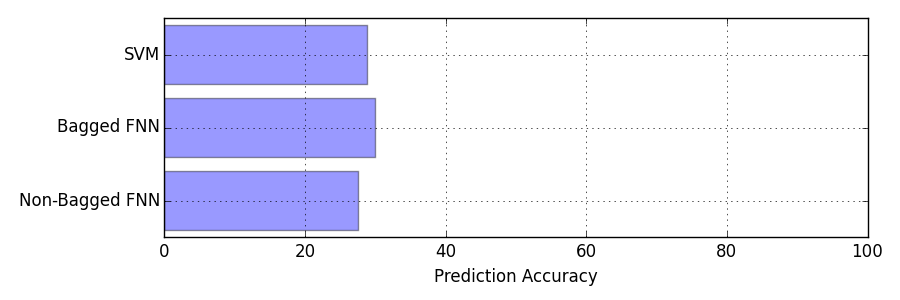

In [11]:
from IPython.display import Image
Image(filename='bar_compare.png') 

Clearly, we can see that the bootstrap aggregation improved the neural network performance by 2.407% on average, as compared to the regular neural network model.  The SVM model also outperformed the non-bagged neural network by a slight 1.27% on average.  In addition, the Bagged FNN model had an accuracy score of 30.550% on 7 folds, which was the best single performance of any model.  On average, the results also demonstrated that the Bagged FNN model slightly outperformed the SVM model by 1.137%.   

##5 Conclusion

We have seen from the results that the bagged neural network can predict the correct gross revenue category of films before their initial theatrical release with a pinpoint accuracy of 30.008%.  Compared to the other model types (non-bagged neural network and SVM) the bagged neural network performed slightly better under the same experimental conditions.

Much additional work remains to be done.  As an example, incorporating early stopping techniques during the training of the neural networks may result in improved prediction accuracy.  To elaborate, while the error on the training set decreases during training, at some point the error on unseen examples increases.􏰎  A sample solution would be to stop training as soon as the generalization loss exceeds a certain threshold.  However, no attempts have been made to add this to the current model.    

##6 References
Sawhney, M. S., & Eliashberg, J. (1996). A parsimonious model for forecasting gross box-office revenues of motion pictures. Marketing Science.

Sharda, M., & Delen, D. (2006).  Predicting box-office success of motion pictures with neural networks.  Expert Systems with Applications 30, 243–254.